In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
purchase = pd.read_csv('/content/sample_data/purchase_behaviour.csv')
purchase.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [ ]:
trans = pd.read_csv('/content/sample_data/transaction_data.csv')
trans['DATE'] = pd.to_datetime(trans['DATE'], origin='1899-12-30', unit='D')
trans.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


### Data Exploration

    1.Examine Transaction data

In [ ]:
# Count occurrences of each product
product = trans["PROD_NAME"].value_counts()#.reset_index()
product.columns = ["PROD_NAME", "N"]
print(product)

PROD_NAME
Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
                                            ... 
RRD Pc Sea Salt     165g                    1431
Woolworths Medium   Salsa 300g              1430
NCC Sour Cream &    Garden Chives 175g      1419
French Fries Potato Chips 175g              1418
WW Crinkle Cut      Original 175g           1410
Name: count, Length: 114, dtype: int64


In [ ]:
#Split product names into individual words
words = pd.Series(" ".join(trans["PROD_NAME"].unique()).split(" "))

# Remove words that contain digits
words = words[~words.str.contains(r"\d", regex=True)]

# Remove words that do not contain at least one alphabetic character
words = words[words.str.contains(r"[a-zA-Z]", regex=True)]

# Count occurrences of each word
word_counts = words.value_counts().reset_index()
word_counts.columns = ["words", "N"]

# Sort by frequency
word_counts = word_counts.sort_values(by="N", ascending=False)

# Display result
print(word_counts)


         words   N
0        Chips  21
1       Smiths  16
2          Cut  14
3      Crinkle  14
4       Kettle  13
..         ...  ..
184        Rst   1
185       Pork   1
186      Belly   1
187         Pc   1
188  Bolognese   1

[189 rows x 2 columns]


In [ ]:
# Remove rows where 'PROD_NAME' contains 'salsa' (case-insensitive)
trans = trans[~trans["PROD_NAME"].str.contains("salsa", case=False, na=False)]

In [ ]:
trans.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,2018-12-30 01:19:01.211467520,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000
std,NaN,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828


In [ ]:
#Find outlier in the PROD_QTY
filtered_data = trans[trans["PROD_QTY"] == 200]
print(filtered_data)


            DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69762 2018-08-19        226          226000  226201         4   
69763 2019-05-20        226          226000  226210         4   

                              PROD_NAME  PROD_QTY  TOT_SALES  
69762  Dorito Corn Chp     Supreme 380g       200      650.0  
69763  Dorito Corn Chp     Supreme 380g       200      650.0  


There are two transactions where 200 packets of chips are bought in one transaction and both of these
transactions where by the same customer.

In [ ]:
# check if the customer has had other transactions
filtered = trans[trans["LYLTY_CARD_NBR"] == 226000]
filtered

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


It looks like this customer has only had the two transactions over the year and is not an ordinary retail
customer.

In [ ]:
#Filter out the customer
df1 =  trans[trans["LYLTY_CARD_NBR"] != 226000]
df1.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246740,246740.000000,2.467400e+05,2.467400e+05,246740.000000,246740.000000,246740.000000
mean,2018-12-30 01:18:58.448569344,135.050361,1.355303e+05,1.351304e+05,56.352213,1.906456,7.316113
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756875e+04,26.000000,2.000000,5.800000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351815e+05,53.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030832e+05,2.026522e+05,87.000000,2.000000,8.800000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000
std,NaN,76.786971,8.071520e+04,7.814760e+04,33.695235,0.342499,2.474897


In [ ]:
#Count transactions by date
transactions_by_date = df1.groupby("DATE").size().reset_index(name="N")
print(transactions_by_date)


          DATE    N
0   2018-07-01  663
1   2018-07-02  650
2   2018-07-03  674
3   2018-07-04  669
4   2018-07-05  660
..         ...  ...
359 2019-06-26  657
360 2019-06-27  669
361 2019-06-28  673
362 2019-06-29  703
363 2019-06-30  704

[364 rows x 2 columns]


In [ ]:
#Check missing dates
full_date_range = pd.date_range(start = df1["DATE"].min(), end = df1["DATE"].max())
missing_dates = full_date_range.difference(df1["DATE"])

print("Missing Dates:", missing_dates)

Missing Dates: DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq='D')


In [ ]:
# convert to dataframe
full_date_range = pd.DataFrame({"DATE": pd.date_range(start=df1["DATE"].min(),
                                                       end=df1["DATE"].max())})

(array([17713., 17775., 17836., 17897., 17956., 18017., 18078.]),
 [Text(17713.0, 0, '2018-07'),
  Text(17775.0, 0, '2018-09'),
  Text(17836.0, 0, '2018-11'),
  Text(17897.0, 0, '2019-01'),
  Text(17956.0, 0, '2019-03'),
  Text(18017.0, 0, '2019-05'),
  Text(18078.0, 0, '2019-07')])

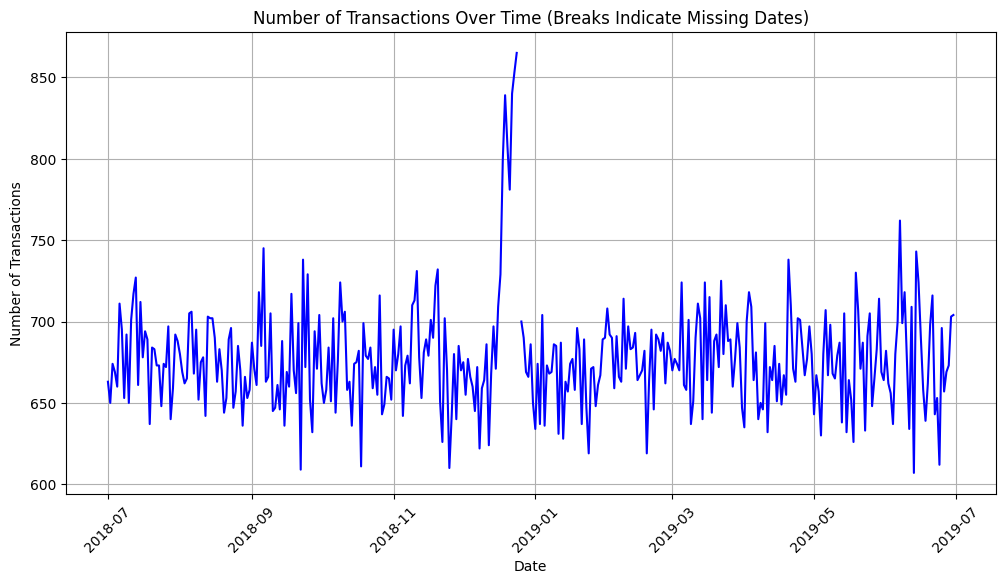

In [ ]:
# Merge with transaction counts to detect missing dates
merged_data = full_date_range.merge(transactions_by_date, on="DATE", how="left")

# Plot time series
plt.figure(figsize=(12, 6))
plt.plot(merged_data["DATE"], merged_data["N"], linestyle="-", color="b")

plt.xlabel("Date")
plt.ylabel("Number of Transactions")
plt.title("Number of Transactions Over Time (Breaks Indicate Missing Dates)")
plt.grid(True)

plt.xticks(rotation=45)


There is an increase in purchases in December and a break in late December.

(array([17866., 17870., 17874., 17878., 17882., 17886., 17890., 17894.,
        17897.]),
 [Text(17866.0, 0, '2018-12-01'),
  Text(17870.0, 0, '2018-12-05'),
  Text(17874.0, 0, '2018-12-09'),
  Text(17878.0, 0, '2018-12-13'),
  Text(17882.0, 0, '2018-12-17'),
  Text(17886.0, 0, '2018-12-21'),
  Text(17890.0, 0, '2018-12-25'),
  Text(17894.0, 0, '2018-12-29'),
  Text(17897.0, 0, '2019-01-01')])

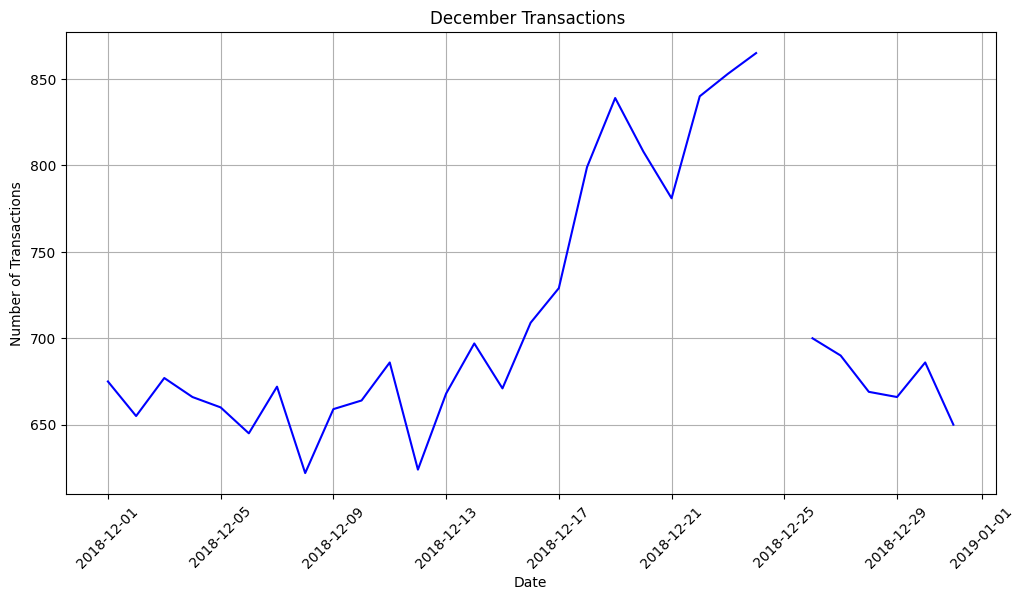

In [ ]:
# Filter for December transactions
december_data = df1[(df1["DATE"].dt.month == 12)]

# Count transactions per day in December
transactions_by_day = december_data.groupby("DATE").size().reset_index(name="Transaction_Count")

# Generate a full date range for December
full_december_range = pd.DataFrame({"DATE": pd.date_range(start=transactions_by_day["DATE"].min(),
                                                           end=transactions_by_day["DATE"].max())})

# Merge with December transactions to identify missing dates
merged_december_data = full_december_range.merge(transactions_by_day, on="DATE", how="left")

# Plot the time series for December
plt.figure(figsize=(12, 6))
plt.plot(merged_december_data["DATE"], merged_december_data["Transaction_Count"], linestyle="-", color="b")

plt.xlabel("Date")
plt.ylabel("Number of Transactions")
plt.title("December Transactions ")
plt.grid(True)
plt.xticks(rotation=45)

 The increase in sales occurs in the lead-up to Christmas and that there are zero sales on
Christmas day itself. This is due to shops being closed on Christmas day.

In [ ]:
#Generate Product size column
df1["PACK_SIZE"] = df1["PROD_NAME"].str.extract(r"(\d+)").astype(float) #Extract numbers from PROD_NAME

# Check pack size distribution
pack_size_counts = df1.groupby("PACK_SIZE").size().reset_index(name="Count")

# Sort by PACK_SIZE
pack_size_counts = pack_size_counts.sort_values("PACK_SIZE")

print(pack_size_counts)

    PACK_SIZE  Count
0        70.0   1507
1        90.0   3008
2       110.0  22387
3       125.0   1454
4       134.0  25102
5       135.0   3257
6       150.0  40203
7       160.0   2970
8       165.0  15297
9       170.0  19983
10      175.0  66390
11      180.0   1468
12      190.0   2995
13      200.0   4473
14      210.0   6272
15      220.0   1564
16      250.0   3169
17      270.0   6285
18      330.0  12540
19      380.0   6416


The largest size is 380g and the smallest size is 70g -

In [ ]:
df1.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150.0


In [ ]:
#Generate brand name column from PROD_NAME
df1["BRAND"] = df1["PROD_NAME"].str.split(" ").str[0].str.upper()
brand_counts = df1.groupby("BRAND").size().reset_index(name="Count")

# Sort by count in descending order
brand_counts = brand_counts.sort_values("Count", ascending=False)
print(brand_counts)

         BRAND  Count
12      KETTLE  41288
19      SMITHS  27390
15    PRINGLES  25102
6      DORITOS  22041
22       THINS  14075
17         RRD  11894
10   INFUZIONS  11057
27          WW  10320
4         COBS   9693
23    TOSTITOS   9471
24    TWISTIES   9454
25    TYRRELLS   6442
8        GRAIN   6272
13     NATURAL   6050
3     CHEEZELS   4603
1          CCS   4551
16         RED   4427
5       DORITO   3183
11      INFZNS   3144
18       SMITH   2963
2      CHEETOS   2927
20       SNBTS   1576
0       BURGER   1564
26  WOOLWORTHS   1516
9      GRNWVES   1468
21    SUNBITES   1432
14         NCC   1419
7       FRENCH   1418


Some of the brand names look like they are of the same brands - such as RED and RRD, which are both Red
Rock Deli chips.

In [ ]:
#Clean brand names
# Define brand name corrections
brand_corrections = {"RED": "RRD", "SNBTS": "SUNBITES",
                      "INFZNS": "INFUZIONS", "WW": "WOOLWORTHS",
                      "SMITH": "SMITHS", "NCC": "NATURAL",
                      "DORITO": "DORITOS", "GRAIN": "GRNWVES"}

# Apply corrections
df1["BRAND"] = df1["BRAND"].replace(brand_corrections)
brand_counts = df1.groupby("BRAND").size().reset_index(name="Count")

brand_counts = brand_counts.sort_values("BRAND")
print(brand_counts)


         BRAND  Count
0       BURGER   1564
1          CCS   4551
2      CHEETOS   2927
3     CHEEZELS   4603
4         COBS   9693
5      DORITOS  25224
6       FRENCH   1418
7      GRNWVES   7740
8    INFUZIONS  14201
9       KETTLE  41288
10     NATURAL   7469
11    PRINGLES  25102
12         RRD  16321
13      SMITHS  30353
14    SUNBITES   3008
15       THINS  14075
16    TOSTITOS   9471
17    TWISTIES   9454
18    TYRRELLS   6442
19  WOOLWORTHS  11836


      2.Examining Customer Data

In [ ]:
purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [ ]:
purchase['LIFESTAGE'].value_counts()

,count
LIFESTAGE,
RETIREES,14805
OLDER SINGLES/COUPLES,14609
YOUNG SINGLES/COUPLES,14441
OLDER FAMILIES,9780
YOUNG FAMILIES,9178
MIDAGE SINGLES/COUPLES,7275
NEW FAMILIES,2549


In [ ]:
purchase['PREMIUM_CUSTOMER'].value_counts()

,count
PREMIUM_CUSTOMER,
Mainstream,29245
Budget,24470
Premium,18922


In [ ]:
#Merge the 2 datasets
df = pd.merge(df1, purchase, on='LYLTY_CARD_NBR')
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0,CCS,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0,SMITHS,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175.0,SMITHS,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150.0,KETTLE,MIDAGE SINGLES/COUPLES,Budget


In [ ]:
#check for nulls
df.isnull().sum()

,0
DATE,0
STORE_NBR,0
LYLTY_CARD_NBR,0
TXN_ID,0
PROD_NBR,0
PROD_NAME,0
PROD_QTY,0
TOT_SALES,0
PACK_SIZE,0
BRAND,0


In [ ]:
#Save the merged data as a csv file
file_path = "chips_data.csv"
df.to_csv(file_path, index=False)

print(f"Data saved to {file_path}")

Data saved to chips_data.csv


### Data Analysis

**Which customer segment contribute most to chip sales?**

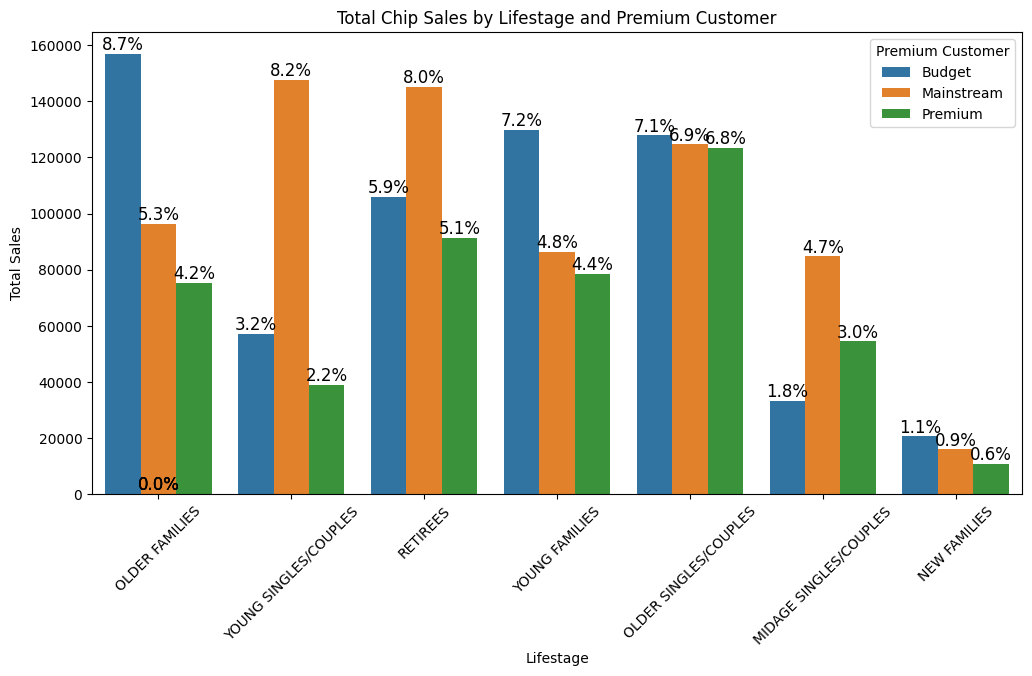

In [ ]:
# Group total sales by LIFESTAGE and PREMIUM_CUSTOMER
sales_by_segment = df.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["TOT_SALES"].sum().reset_index()

#total sales proportion
sales_by_segment["Proportion"] = (sales_by_segment["TOT_SALES"] / sales_by_segment["TOT_SALES"].sum()) * 100
sales_by_segment = sales_by_segment.sort_values("TOT_SALES", ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x="LIFESTAGE", y="TOT_SALES", hue="PREMIUM_CUSTOMER", data=sales_by_segment)

# Annotate bars with proportions
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height / sales_by_segment["TOT_SALES"].sum():.1%}',  # Format as percentage
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=12, color='black')

# Customize plot
plt.title("Total Chip Sales by Lifestage and Premium Customer")
plt.xlabel("Lifestage")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.legend(title="Premium Customer")


Sales are coming mainly from Budget - older families, Mainstream - young singles/couples, and Mainstream - retirees


Check if the higher sales are due to there being more customers who buy chips

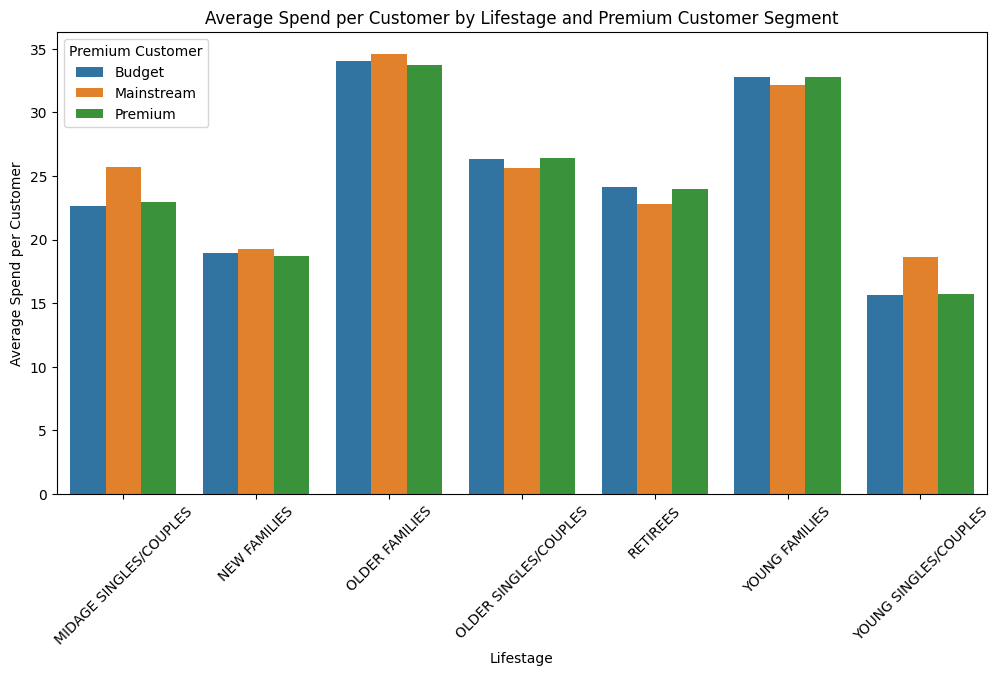

In [ ]:
#unique customers per segment
customers_per_segment = df.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["LYLTY_CARD_NBR"].nunique().reset_index()
customers_per_segment.rename(columns={"LYLTY_CARD_NBR": "Unique_Customers"}, inplace=True)

#average spend per customer
sales_per_segment = df.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["TOT_SALES"].sum().reset_index()
sales_per_segment = sales_per_segment.merge(customers_per_segment, on=["LIFESTAGE", "PREMIUM_CUSTOMER"])
sales_per_segment["Avg_Spend_Per_Customer"] = sales_per_segment["TOT_SALES"] / sales_per_segment["Unique_Customers"]

# Plot average spend per customer
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="LIFESTAGE", y="Avg_Spend_Per_Customer", hue="PREMIUM_CUSTOMER", data=sales_per_segment)
plt.title("Average Spend per Customer by Lifestage and Premium Customer Segment")
plt.xlabel("Lifestage")
plt.ylabel("Average Spend per Customer")
plt.xticks(rotation=45)
plt.legend(title="Premium Customer")



There are more Mainstream - young singles/couples and Mainstream - retirees who buy chips. This contributes to there being more sales to these customer segments but this is not a major driver for the Budget- Older families segment.Sales are due to higher spending per customer

**Higher sales may also be driven by more units of chips being bought per customer. **

In [ ]:
# Total quantity of chips bought per segment
quantity_per_segment = df.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["PROD_QTY"].sum().reset_index()
quantity_per_segment.rename(columns={"PROD_QTY": "Total_Quantity"}, inplace=True)

# Merge with unique customer count
quantity_per_segment = quantity_per_segment.merge(customers_per_segment, on=["LIFESTAGE", "PREMIUM_CUSTOMER"])
quantity_per_segment["Avg_Qty_Per_Customer"] = quantity_per_segment["Total_Quantity"] / quantity_per_segment["Unique_Customers"]

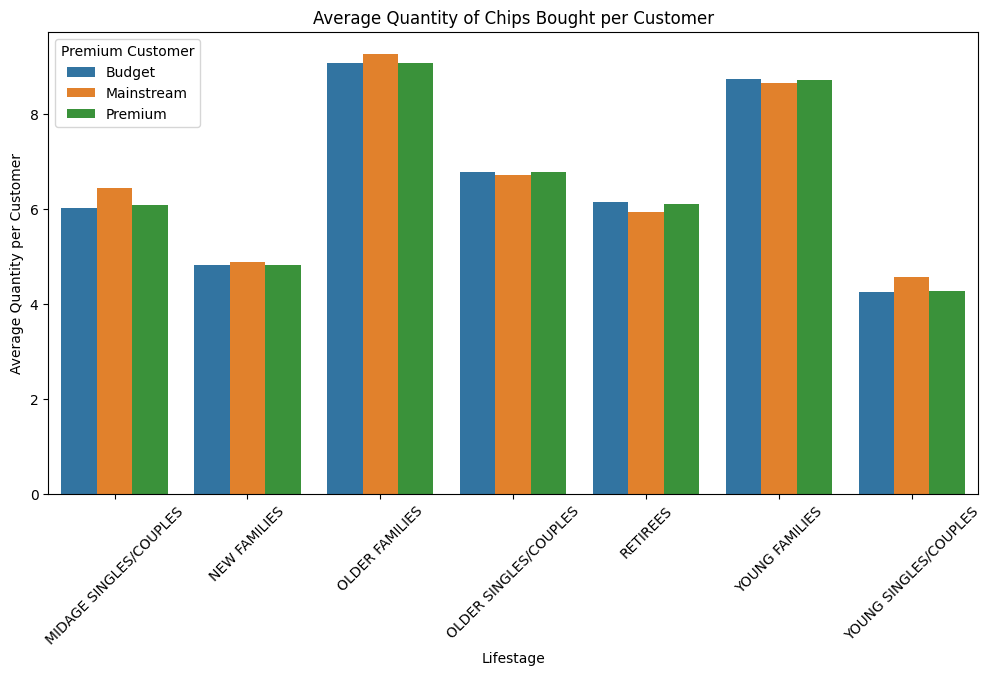

In [ ]:
# Plot average quantity per customer
plt.figure(figsize=(12, 6))
sns.barplot(x="LIFESTAGE", y="Avg_Qty_Per_Customer", hue="PREMIUM_CUSTOMER", data=quantity_per_segment)
plt.title("Average Quantity of Chips Bought per Customer")
plt.xlabel("Lifestage")
plt.ylabel("Average Quantity per Customer")
plt.xticks(rotation=45)
plt.legend(title="Premium Customer")
plt.show()

Older families and young families in general buy more chips per customer.Higher sales are due to more units per customer

**Investigate the average price per unit chips bought for each customer segment**

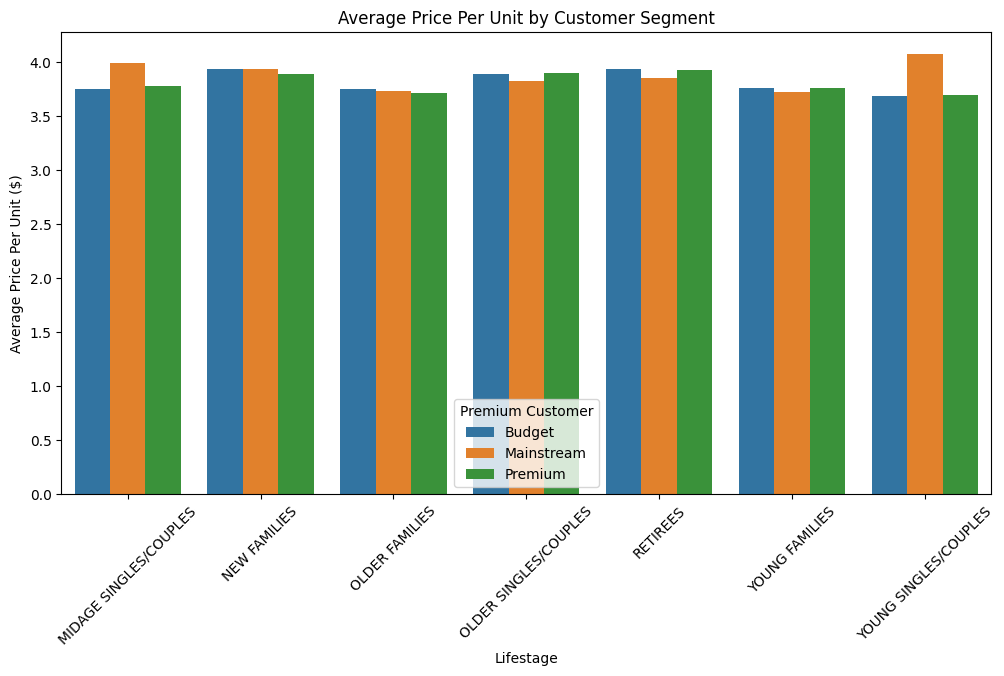

In [ ]:
#total revenue and total quantity per segment
price_per_unit = df.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"]).agg(
                              Total_Revenue=("TOT_SALES", "sum"),
                              Total_Quantity=("PROD_QTY", "sum")).reset_index()

#average price per unit
price_per_unit["Avg_Price_Per_Unit"] = price_per_unit["Total_Revenue"] / price_per_unit["Total_Quantity"]

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x="LIFESTAGE", y="Avg_Price_Per_Unit", hue="PREMIUM_CUSTOMER", data=price_per_unit)
plt.title("Average Price Per Unit by Customer Segment")
plt.xlabel("Lifestage")
plt.ylabel("Average Price Per Unit ($)")
plt.xticks(rotation=45)
plt.legend(title="Premium Customer")


Mainstream midage and young singles and couples are more willing to pay more per packet of chips compared to their budget and premium counterparts. This may be due to premium shoppers being more likely to
buy healthy snacks and when they buy chips, this is mainly for entertainment purposes rather than their own
consumption. This is also supported by there being fewer premium midage and young singles and couples
buying chips compared to their mainstream counterparts.

As the difference in average price per unit isn’t large, check if this difference is statistically different.

In [ ]:
from scipy.stats import ttest_ind #independent t-test

#price per unit
df["price_per_unit"] = df["TOT_SALES"] / df["PROD_QTY"]

# Define groups for t-test
mainstream_group = df[
    (df["LIFESTAGE"].isin(["YOUNG SINGLES/COUPLES", "MIDAGE SINGLES/COUPLES"])) &
    (df["PREMIUM_CUSTOMER"] == "Mainstream")]["price_per_unit"]

other_group = df[
    (df["LIFESTAGE"].isin(["YOUNG SINGLES/COUPLES", "MIDAGE SINGLES/COUPLES"])) &
    (df["PREMIUM_CUSTOMER"] != "Mainstream")]["price_per_unit"]

# Perform one-tailed t-test
t_stat, p_value = ttest_ind(mainstream_group, other_group, alternative='greater')

print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("The difference in average price per unit is statistically significant.")
else:
    print("The difference is not statistically significant.")


T-statistic: 37.8320, P-value: 0.0000
The difference in average price per unit is statistically significant.


The unit price for mainstream, young and mid-age singles and
couples are significantly higher than that of budget or premium, young and midage singles and couples.

Mainstream - young singles/couples, find out if they tend to
buy a particular brand of chips.

In [ ]:
# Filter data for the target segment
segment1 = df[(df["LIFESTAGE"] == "YOUNG SINGLES/COUPLES") &
              (df["PREMIUM_CUSTOMER"] == "Mainstream")]

# Filter data for the rest of the population
other = df[~((df["LIFESTAGE"] == "YOUNG SINGLES/COUPLES") &
              (df["PREMIUM_CUSTOMER"] == "Mainstream"))]

#total quantity of chips purchased by each group
quantity_segment1 = segment1["PROD_QTY"].sum()
quantity_other = other["PROD_QTY"].sum()

# Compute brand-wise proportion of chip purchases
quantity_segment1_by_brand = (segment1.groupby("BRAND")["PROD_QTY"].sum().reset_index())
quantity_segment1_by_brand["targetSegment"] = quantity_segment1_by_brand["PROD_QTY"] / quantity_segment1
quantity_segment1_by_brand.drop(columns=["PROD_QTY"], inplace=True)

quantity_other_by_brand = (other.groupby("BRAND")["PROD_QTY"].sum().reset_index())
quantity_other_by_brand["other"] = quantity_other_by_brand["PROD_QTY"] / quantity_other
quantity_other_by_brand.drop(columns=["PROD_QTY"], inplace=True)

# Merge the two dataframes
brand_proportions = pd.merge(quantity_segment1_by_brand, quantity_other_by_brand, on="BRAND", how="inner")

#brand affinity ratio
brand_proportions["affinityToBrand"] = brand_proportions["targetSegment"] / brand_proportions["other"]

# Sort by affinity score (higher means stronger preference)
brand_proportions = brand_proportions.sort_values(by="affinityToBrand", ascending=False)


In [ ]:
print(brand_proportions)

         BRAND  targetSegment     other  affinityToBrand
18    TYRRELLS       0.031553  0.025692         1.228095
17    TWISTIES       0.046184  0.037877         1.219319
5      DORITOS       0.122761  0.101075         1.214553
9       KETTLE       0.197985  0.165553         1.195897
16    TOSTITOS       0.045411  0.037978         1.195713
11    PRINGLES       0.119420  0.100635         1.186670
4         COBS       0.044638  0.039049         1.143124
8    INFUZIONS       0.064679  0.057065         1.133435
15       THINS       0.060373  0.056986         1.059423
7      GRNWVES       0.032712  0.031188         1.048873
3     CHEEZELS       0.017971  0.018647         0.963753
13      SMITHS       0.096370  0.124584         0.773536
6       FRENCH       0.003948  0.005758         0.685569
2      CHEETOS       0.008033  0.012067         0.665733
12         RRD       0.043810  0.067494         0.649091
10     NATURAL       0.019600  0.030854         0.635241
1          CCS       0.011180  

Mainstream young singles/couples are 23% more likely to purchase Tyrrells chips compared to the
rest of the population.


Mainstream young singles/couples are 56% less likely to purchase Burger Rings compared to the rest
of the population.

Find out if our target segment tends to buy larger packs of chips.


In [ ]:
#pack-size-wise proportion of chip purchases
quantity_segment1_by_pack = (segment1.groupby("PACK_SIZE")["PROD_QTY"].sum().reset_index())
quantity_segment1_by_pack["targetSegment"] = quantity_segment1_by_pack["PROD_QTY"] / quantity_segment1
quantity_segment1_by_pack.drop(columns=["PROD_QTY"], inplace=True)

quantity_other_by_pack = (other.groupby("PACK_SIZE")["PROD_QTY"].sum().reset_index())
quantity_other_by_pack["other"] = quantity_other_by_pack["PROD_QTY"] / quantity_other
quantity_other_by_pack.drop(columns=["PROD_QTY"], inplace=True)

# Merge
pack_proportions = pd.merge(quantity_segment1_by_pack, quantity_other_by_pack, on="PACK_SIZE", how="inner")

#affinity ratio
pack_proportions["affinityToPack"] = pack_proportions["targetSegment"] / pack_proportions["other"]

# Sort by affinity score
pack_proportions = pack_proportions.sort_values(by="affinityToPack", ascending=False)

In [ ]:
pack_proportions = pack_proportions.sort_values(by="affinityToPack", ascending=False)
print(pack_proportions)

    PACK_SIZE  targetSegment     other  affinityToPack
17      270.0       0.031829  0.025096        1.268287
19      380.0       0.032160  0.025584        1.257030
18      330.0       0.061284  0.050162        1.221717
4       134.0       0.119420  0.100635        1.186670
2       110.0       0.106280  0.089791        1.183637
14      210.0       0.029124  0.025121        1.159318
5       135.0       0.014769  0.013075        1.129511
16      250.0       0.014355  0.012781        1.123166
9       170.0       0.080773  0.080986        0.997370
6       150.0       0.157598  0.163421        0.964372
10      175.0       0.254990  0.270007        0.944382
8       165.0       0.055652  0.062268        0.893757
12      190.0       0.007481  0.012442        0.601271
11      180.0       0.003589  0.006067        0.591538
7       160.0       0.006404  0.012373        0.517616
1        90.0       0.006349  0.012580        0.504698
3       125.0       0.003009  0.006037        0.498442
13      20

Mainstream young singles/couples are 27% more likely to purchase a 270g pack of chips compared to the rest of the population.

what brands sell this pack size?

In [ ]:
df.loc[df["PACK_SIZE"] == 270, "PROD_NAME"].unique()

array(['Twisties Cheese     270g', 'Twisties Chicken270g'], dtype=object)

### **Conclusion**

    Key Insights on Chip Sales and Consumer Behavior

The analysis reveals that chip sales are primarily driven by three key customer segments:

  .Budget - Older Families

  .Mainstream - Young Singles/Couples

  .Mainstream - Retirees

    Why Are Sales Higher in These Segments?
The higher sales among mainstream young singles/couples and retirees are largely due to the greater number of shoppers in these groups rather than individual spending habits.

However, mainstream mid-age and young singles/couples are more likely to pay a premium per packet, suggesting impulse buying behavior.

    Brand Preferences & Strategic Recommendations
Mainstream young singles/couples are 23% more likely to purchase Tyrrells chips compared to other shoppers.

To boost sales, the Category Manager should consider:

      Increasing visibility of Tyrrells and smaller packs by placing them in high-traffic discretionary areas frequented by young singles and couples.

      Leveraging Quantium's expertise to identify ideal placement locations and measure the impact of these strategic changes.

This data-driven approach can enhance category performance by capitalizing on impulse purchases and targeted product placements.